# **Coronavirus Vaccine**

Coronavirus disease 2019 (COVID-19) is an infectious disease caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). It was first identified in December 2019 in Wuhan, Hubei, China, and has resulted in an ongoing pandemic. The first confirmed case has been traced back to 17 November 2019 in Hubei.As of 6 August 2020, more than 18.7 million cases have been reported across 188 countries and territories, resulting in more than 706,000 deaths. More than 11.3 million people have recovered.

Until now, a vaccine for this disease has not been found. However, lately a lot of parties have started to raise rumors about the issue of vaccine findings.

Most of the people today share opinions and information about COVID-19 vaccine through various social media, including Twitter. Today we will analyze the content of conversations between Twitter users regarding the keyword "vaccine" and "vaccines" in English.

We use text mining technique to analyze this textual data. Text mining is a process of exploring sizeable textual data and find patterns. Text Mining process the text itself. Finding frequency counts of words, length of the sentence, presence/absence of specific words is known as text mining.

Natural language processing is one of the components of text mining. NLP helps identified sentiment, finding entities in the sentence, and category of blog/article. Text mining is preprocessed data for text analytics. In Text Analytics, statistical and machine learning algorithm used to classify information.

## **A. Text Preprocessing**

Text preprocessing is traditionally an important step for natural language processing (NLP) tasks. It transforms text into a more digestible form so that machine learning algorithms can perform better.

***Import Library***

We need to import some libraries first. Here are the libraries we need to import.

In [ ]:
# Import library for Text Analytics
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
# Import Libraries for Data Manipulation
import pandas as pd
import matplotlib.pyplot as plt

***Import Data***

Then, import our demonetization tweets dataset into this notebook using Pandas library. 

In [ ]:
# Import Data
tweets=pd.read_csv('https://raw.githubusercontent.com/machine-learning-ss/dataset/master/vaccine.csv')
tweets.head()

,user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,is_retweet,favorite_count,retweet_count,quote_count,reply_count,hashtags,symbols,urls_url,urls_t.co,urls_expanded_url,media_url,media_t.co,media_expanded_url,media_type,ext_media_url,ext_media_t.co,ext_media_expanded_url,ext_media_type,mentions_user_id,mentions_screen_name,lang,quoted_status_id,quoted_text,quoted_created_at,quoted_source,quoted_favorite_count,quoted_retweet_count,quoted_user_id,quoted_screen_name,...,retweet_source,retweet_favorite_count,retweet_retweet_count,retweet_user_id,retweet_screen_name,retweet_name,retweet_followers_count,retweet_friends_count,retweet_statuses_count,retweet_location,retweet_description,retweet_verified,place_url,place_name,place_full_name,place_type,country,country_code,geo_coords,coords_coords,bbox_coords,status_url,name,location,description,url,protected,followers_count,friends_count,listed_count,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url
0,x1215744507037257728,x1291293596742819840,2020-08-06 08:42:39,MeripetU,@mikhailhkmy Maybe #China takes down Malaysia ...,Twitter for iPhone,58,x1291077126104416258,x1162206097576304642,mikhailhkmy,False,False,0,0,NaN,NaN,China Vaccine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,x1162206097576304642,mikhailhkmy,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA NA,NA NA,NA NA NA NA NA NA NA NA,https://twitter.com/MeripetU/status/1291293596...,Meripet Uyghur,NaN,"Human, Uyghur, Woman, Daughter, Sister, Mother...",NaN,False,526,385,0,4456,1416,2020-01-10 21:17:44,False,NaN,NaN,NaN,https://pbs.twimg.com/profile_banners/12157445...,NaN,http://pbs.twimg.com/profile_images/1288907883...
1,x368847378,x1291293589805232129,2020-08-06 08:42:37,lovemytristan,@leighsales I am utterly disappointed that you...,Twitter for iPhone,266,x1291215855594831873,x26607837,leighsales,False,False,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,x26607837,leighsales,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA NA,NA NA,NA NA NA NA NA NA NA NA,https://twitter.com/lovemytristan/status/12912...,Annmarie Pendleton,NaN,NaN,NaN,False,2,10,0,24,5,2011-09-06 10:07:44,False,NaN,NaN,NaN,NaN,http://abs.twimg.com/images/themes/theme1/bg.png,http://abs.twimg.com/sticky/default_profile_im...
2,x22314366,x1291293549053407232,2020-08-06 08:42:27,iMn0tFamoUs,Oh okay so #Indonesia will try this Chinese de...,Twitter Web App,105,NaN,NaN,NaN,True,False,0,0,NaN,NaN,Indonesia COVID__19,NaN,twitter.com/ChannelNewsAsi…,https://t.co/NVzXUKhBkC,https://twitter.com/ChannelNewsAsia/status/129...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en,x1291278977378578432,Human trials of COVID-19 vaccine set to begin ...,2020-08-06 07:44:33,dlvr.it,12.0,5.0,x38400130,ChannelNewsAsia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA NA,NA NA,NA NA NA NA NA NA NA NA,https://twitter.com/iMn0tFamoUs/status/1291293...,JHV,NaN,***Views are mine and not of my employer***,NaN,False,499,366,6,13386,9215,2009-03-01 00:34:08,False,NaN,NaN,NaN,NaN,http://abs.twimg.com/images/themes/theme15/bg.png,http://pbs.twimg.com/profile_images/1262703650...
3,x1069662318064218112,x1291293538660036608,2020-08-06 08:42:25,PastorJimberoo1,@JamesJo70730845 @roodog It has to be safe and...,Twitter for iPhone,205,x1291292429950357505,x1277517755546324993,JamesJo70730845,False,False,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,x1277517755546324993 x20183724,JamesJo70730845 roodog,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA NA,NA NA,NA NA NA NA NA NA NA NA,https://twitter.com/PastorJimberoo1/status/129...,Lord Pastor “Now’s 

***Select Data***

We will use only text(tweets) data in this text mining modeling.

In [ ]:
# Select Only Text Column
text = tweets[['text']]
text.head()

,text
0,@mikhailhkmy Maybe #China takes down Malaysia ...
1,@leighsales I am utterly disappointed that you...
2,Oh okay so #Indonesia will try this Chinese de...
3,@JamesJo70730845 @roodog It has to be safe and...
4,The key to economic recovery and its pace is a...


***Clean the Dataset***

In [ ]:
# Create Text Cleaning Function using Regex
import re

def  clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem)) 
    
    # remove numbers
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"\d+", "", elem))
    return df

# Apply to the data
text_clean = clean_text(text, 'text')
text_clean.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

,text
0,maybe china takes down malaysia thime with th...
1,i am utterly disappointed that you said this ...
2,oh okay so indonesia will try this chinese dev...
3,it has to be safe and i accept there have be...
4,the key to economic recovery and its pace is a...


In [ ]:
# Import Stopword
import nltk.corpus
nltk.download('stopwords')

# Apply Stopword to the dataframe
from nltk.corpus import stopwords
stop = stopwords.words('english')

text_clean['nostopword'] = text_clean['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
text_clean.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,text,nostopword
0,maybe china takes down malaysia thime with th...,maybe china takes malaysia thime vaccine
1,i am utterly disappointed that you said this ...,utterly disappointed said article interesting ...
2,oh okay so indonesia will try this chinese dev...,oh okay indonesia try chinese developed covid ...
3,it has to be safe and i accept there have be...,safe accept examples past like thalidomide etc...
4,the key to economic recovery and its pace is a...,key economic recovery pace vaccine long takes ...


In [ ]:
# Import Punkt
import nltk 
nltk.download('punkt')

# Tokenize
from nltk.tokenize import sent_tokenize, word_tokenize
text_clean['tokenize'] = text_clean['nostopword'].apply(lambda x: word_tokenize(x))
text_clean.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,text,nostopword,tokenize
0,maybe china takes down malaysia thime with th...,maybe china takes malaysia thime vaccine,"[maybe, china, takes, malaysia, thime, vaccine]"
1,i am utterly disappointed that you said this ...,utterly disappointed said article interesting ...,"[utterly, disappointed, said, article, interes..."
2,oh okay so indonesia will try this chinese dev...,oh okay indonesia try chinese developed covid ...,"[oh, okay, indonesia, try, chinese, developed,..."
3,it has to be safe and i accept there have be...,safe accept examples past like thalidomide etc...,"[safe, accept, examples, past, like, thalidomi..."
4,the key to economic recovery and its pace is a...,key economic recovery pace vaccine long takes ...,"[key, economic, recovery, pace, vaccine, long,..."


In [ ]:
# Import Stemmer
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize

# Create Stemmer Function
def word_stemmer(text):
    stem_text = [PorterStemmer().stem(i) for i in text]
    return stem_text

# Apply to the dataframe
text_clean['stemming'] = text_clean['tokenize'].apply(lambda x: word_stemmer(x))
text_clean.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,text,nostopword,tokenize,stemming
0,maybe china takes down malaysia thime with th...,maybe china takes malaysia thime vaccine,"[maybe, china, takes, malaysia, thime, vaccine]","[mayb, china, take, malaysia, thime, vaccin]"
1,i am utterly disappointed that you said this ...,utterly disappointed said article interesting ...,"[utterly, disappointed, said, article, interes...","[utterli, disappoint, said, articl, interest, ..."
2,oh okay so indonesia will try this chinese dev...,oh okay indonesia try chinese developed covid ...,"[oh, okay, indonesia, try, chinese, developed,...","[oh, okay, indonesia, tri, chines, develop, co..."
3,it has to be safe and i accept there have be...,safe accept examples past like thalidomide etc...,"[safe, accept, examples, past, like, thalidomi...","[safe, accept, exampl, past, like, thalidomid,..."
4,the key to economic recovery and its pace is a...,key economic recovery pace vaccine long takes ...,"[key, economic, recovery, pace, vaccine, long,...","[key, econom, recoveri, pace, vaccin, long, ta..."


In [ ]:
# Import Wordnet Library
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

# Create Lematization Funtion
def word_lemmatizer(text):
    lem_text = [WordNetLemmatizer().lemmatize(i, pos='v') for i in text]
    return lem_text

# Apply to a dataframe
text_clean['lemmatization'] = text_clean['tokenize'].apply(lambda x: word_lemmatizer(x))
text_clean.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,text,nostopword,tokenize,stemming,lemmatization
0,maybe china takes down malaysia thime with th...,maybe china takes malaysia thime vaccine,"[maybe, china, takes, malaysia, thime, vaccine]","[mayb, china, take, malaysia, thime, vaccin]","[maybe, china, take, malaysia, thime, vaccine]"
1,i am utterly disappointed that you said this ...,utterly disappointed said article interesting ...,"[utterly, disappointed, said, article, interes...","[utterli, disappoint, said, articl, interest, ...","[utterly, disappoint, say, article, interest, ..."
2,oh okay so indonesia will try this chinese dev...,oh okay indonesia try chinese developed covid ...,"[oh, okay, indonesia, try, chinese, developed,...","[oh, okay, indonesia, tri, chines, develop, co...","[oh, okay, indonesia, try, chinese, develop, c..."
3,it has to be safe and i accept there have be...,safe accept examples past like thalidomide etc...,"[safe, accept, examples, past, like, thalidomi...","[safe, accept, exampl, past, like, thalidomid,...","[safe, accept, examples, past, like, thalidomi..."
4,the key to economic recovery and its pace is a...,key economic recovery pace vaccine long takes ...,"[key, economic, recovery, pace, vaccine, long,...","[key, econom, recoveri, pace, vaccin, long, ta...","[key, economic, recovery, pace, vaccine, long,..."


In [ ]:
# Convert to a New Dataframe
text_preprocessed = text_clean['lemmatization'].str.join(",") 
text_preprocessed = text_preprocessed.str.replace(',', ' ', regex=False)
text_preprocessed = pd.DataFrame(text_preprocessed)
text_preprocessed.rename(columns={'lemmatization': 'text'}, inplace = True)
text_preprocessed

,text
0,maybe china take malaysia thime vaccine
1,utterly disappoint say article interest scient...
2,oh okay indonesia try chinese develop covid va...
3,safe accept examples past like thalidomide etc...
4,key economic recovery pace vaccine long take e...
...,...
17864,read virus vaccine go cost gov already pay res...
17865,druginfo people around world successfully trea...
17866,bring matt vaccine job save millions live doub...
17867,randomize control trials show zinc use conjunc...


In [ ]:
# Save as CSV
text_preprocessed.to_csv('text_preprocessed_vaccine.csv', index=False)

## **B. Sentiment Analysis**

Text classification is the process of assigning tags or categories to text according to its content. It’s one of the fundamental tasks in Natural Language Processing (NLP) with broad applications such as sentiment analysis, topic labeling, spam detection, and intent detection.

***Import Library***

In [ ]:
# Import library for Text Analytics
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
# Import Libraries for Data Manipulation
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

***Modeling Sentiment Analysis***

In [ ]:
# Import Module
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

# Sentiment Analysis
sid = SentimentIntensityAnalyzer()
listy = [] 
for index, row in text_preprocessed.iterrows():
  ss = sid.polarity_scores(row['text'])
  listy.append(ss)
  
se = pd.Series(listy)
text_preprocessed['polarity'] = se.values
display(text_preprocessed.head(5))

,text,polarity
0,maybe china take malaysia thime vaccine,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,utterly disappoint say article interest scient...,"{'neg': 0.168, 'neu': 0.548, 'pos': 0.284, 'co..."
2,oh okay indonesia try chinese develop covid va...,"{'neg': 0.0, 'neu': 0.853, 'pos': 0.147, 'comp..."
3,safe accept examples past like thalidomide etc...,"{'neg': 0.0, 'neu': 0.652, 'pos': 0.348, 'comp..."
4,key economic recovery pace vaccine long take e...,"{'neg': 0.0, 'neu': 0.807, 'pos': 0.193, 'comp..."


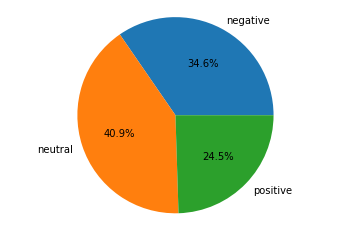

In [ ]:
# Pie Chart Visualization
labels = ['negative', 'neutral', 'positive']
sizes  = [ss['neg'], ss['neu'], ss['pos']]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal') 
plt.show()

In [ ]:
# Save as CSV
text_preprocessed.to_csv('sentiment_vaccine.csv', index=False)

## **C. Topic Modeling**

Topic model is a type of statistical model for discovering the abstract "topics" that occur in a collection of documents. Topic modeling is a frequently used text-mining tool for discovery of hidden semantic structures in a text body. Intuitively, given that a document is about a particular topic, one would expect particular words to appear in the document more or less frequently: "dog" and "bone" will appear more often in documents about dogs, "cat" and "meow" will appear in documents about cats, and "the" and "is" will appear equally in both. 

***Install Library, Import Libraries, and Import Modules***

In [ ]:
# Install Library
! pip install pyLDAvis

     |████████████████████████████████| 1.6MB 2.8MB/s 
     |████████████████████████████████| 552kB 16.9MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=8c31096ce253b98fe63a221861903d092df8f484f0d6d0c1b4533812ff925cd3
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=fe918f3443d864b31984002b69f598e2daacf88d2d57a1fcfdd67fded621e3bf
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [ ]:
# Import Libraries
import nltk
import os
import numpy as np, pyLDAvis, pyLDAvis.sklearn; pyLDAvis.enable_notebook()

# Import Modules
from __future__ import print_function 
from tqdm import tqdm
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from matplotlib import pyplot as plt

In [ ]:
# Clone Library and Data from Github
! git clone https://github.com/machine-learning-ss/tm

# Set Data Directory
os.chdir('tm')

Cloning into 'tm'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 7 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (7/7), done.


In [ ]:
# Import Stop Words
nltk.download('stopwords')

# Import Data
text_preprocessed = 'text_preprocessed_vaccine.csv'

# Load Tweets Data
import MyLib as TS
Tweets = TS.LoadTxt(text_preprocessed) 
print('Total loaded tweets = {0}'.format(len(Tweets)))

100%|██████████| 17870/17870 [00:00<00:00, 976970.67it/s]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Total loaded tweets = 17870


***Set Number of Topics, Top Topics, Top Words***

In [ ]:
n_topics = 4
top_topics = 4
top_words = 8

***Feature Extraction***

In [ ]:
# Feature Extraction
count_vector = CountVectorizer(lowercase = True, token_pattern = r'\b[a-zA-Z]{3,}\b') 
dtm_tf = count_vector.fit_transform(Tweets)
tf_terms = count_vector.get_feature_names()
del Tweets

***Show Topic***

100%|██████████| 17870/17870 [00:00<00:00, 703690.75it/s]


In total there are 4 major topics, distributed as follows


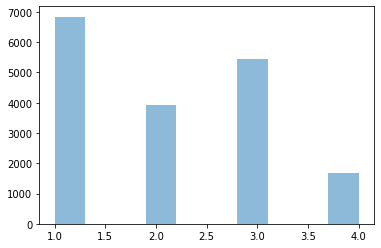

Printing top 4 Topics, with top 8 Words:
Topic #0:
vaccine get vaccines flu people dont mask never
Topic #1:
vaccine covid vaccines coronavirus amp government dose find
Topic #2:
vaccine vaccines covid make gate fauci take say
Topic #3:
vaccine trump health covid public new coronavirus deaths


In [ ]:
# Topic Search Function
lda_tf = LatentDirichletAllocation(n_components=n_topics, learning_method='online', random_state=0).fit(dtm_tf)

# Show Topics
vsm_topics = lda_tf.transform(dtm_tf); doc_topic =  [a.argmax()+1 for a in tqdm(vsm_topics)] # topic of docs
print('In total there are {0} major topics, distributed as follows'.format(len(set(doc_topic))))
plt.hist(np.array(doc_topic), alpha=0.5); plt.show()
print('Printing top {0} Topics, with top {1} Words:'.format(top_topics, top_words))
TS.print_Topics(lda_tf, tf_terms, top_topics, top_words)

In [ ]:
# Interactively visualizing the Topics, please ignore the Warnings
# Wait few minutes and then hover the Mouse over the Topics to Explore
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, count_vector) 

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.186700  0.139661       1        1  36.602448
2     -0.116954 -0.024934       2        1  29.756698
1      0.030304 -0.224316       3        1  21.617344
3      0.273350  0.109589       4        1  12.023510, topic_info=         Term         Freq        Total Category  logprob  loglift
4064    covid  4051.000000  4051.000000  Default  30.0000  30.0000
7147      flu  1507.000000  1507.000000  Default  29.0000  29.0000
7767      get  3076.000000  3076.000000  Default  28.0000  28.0000
19521   trump   922.000000   922.000000  Default  27.0000  27.0000
8475   health   533.000000   533.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
20759     via   139.209241   545.085169   Topic4  -5.4130   0.7533
2751     case   110.228461   299.310364   Topic4  -5.6464   1.1194
11370    make   151.598358  1545.234111   Topic4  -5.3277  -0.2034
688       amp   135.473822  1524.143544   Topic4  -5.4402  -0.3021
8966    human    96.305934   188.859155   Topic4  -5.7814   1.4448

[248 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
103        2  0.998142   access
296        4  0.982022  adviser
426        4  0.995433    ahead
585        1  0.997065  already
590        1  0.998556     also
...      ...       ...      ...
21609      3  0.055178    would
21748      1  0.999102     year
21769      1  0.976814    years
21769      2  0.003006    years
21769      3  0.021039    years

[306 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2, 4])

## **D. Text Network Analysis**

Though network analysis is most often used to describe relationships between people, some of the early pioneers of network analysis realized that it could also be applied to represent relationships between words. For example, one can represent a corpus of documents as a network where each node is a document, and the thickness or strength of the edges between them describes similarities between the words used in any two documents. Or, one can create a textnetwork where individual words are the nodes, and the edges between them describe the regularity with which they co-occur in documents.

There are multiple advantages to a network-based approach to automated text analysis. Just as clusters of social connections can help explain a range of outcomes, understanding patterns of connections between words helps identify their meaning in a more precise manner.Second, text networks can be built out of documents of any length, whereas topic models function poorly on short texts such as social media messages.

In this prcatice we will use NetworkX. NetworkX is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks. You can see the full documentation of NetworkX HERE

Here we construct a text network based on conversations about 'Demonetization in India'.

**Install & Import Libraries**

In [ ]:
# Import Libraries
import numpy as np
import nltk
import itertools
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from nltk import bigrams
from nltk.tokenize import word_tokenize
from random import seed

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

**Import Dataset**

In [ ]:
# Import Data
df = pd.read_csv('clean-tweet-resesi.csv', sep = ',')

# Show Data
df

,text
0,saking bencinya sm jokowi banyak yg lbh suka ...
1,berbagi tulisan sederhana tentang situasi di i...
2,resesi merupakan penurunan signifikan dalam ke...
3,usai resesi inggris kini tengah dihantam gelom...
4,dampak virus corona salah satunya kemerosotan ...
...,...
4439,pemborosan bumn ini jokowi tahu gak ya saat e...
4440,loh mas widas kan nanti kita bisa impor aja ka...
4441,pas itu mba nana pernah nanya jadi yg mana dul...
4442,haha lama ntar ada shopee premium twitter prem...


In [ ]:
# Convert to String
df['text'] = df['text'].fillna('').apply(str)

In [ ]:
# Select Text
text = df['text']
text

0        saking bencinya sm jokowi banyak yg lbh suka ...
1       berbagi tulisan sederhana tentang situasi di i...
2       resesi merupakan penurunan signifikan dalam ke...
3       usai resesi inggris kini tengah dihantam gelom...
4       dampak virus corona salah satunya kemerosotan ...
                              ...                        
4439     pemborosan bumn ini jokowi tahu gak ya saat e...
4440    loh mas widas kan nanti kita bisa impor aja ka...
4441    pas itu mba nana pernah nanya jadi yg mana dul...
4442    haha lama ntar ada shopee premium twitter prem...
4443    haha lama ntar ada shopee premium twitter prem...
Name: text, Length: 4444, dtype: object

### **Preparing Adjacency Matrix**

In [ ]:
# Tokenize
text_data = [word_tokenize(i) for i in text]
print(text_data)

[['saking', 'bencinya', 'sm', 'jokowi', 'banyak', 'yg', 'lbh', 'suka', 'indonesia', 'masuk', 'jurang', 'resesi', 'biar', 'bisa', 'ada', 'bhan', 'bullytidak', 'peduli', 'gmn', 'hncurnya', 'hidup', 'mereka', 'nanti', 'klw', 'kejadian', 'bnaran', 'ckckckmiris', 'bnget', 'gw'], ['berbagi', 'tulisan', 'sederhana', 'tentang', 'situasi', 'di', 'inggris', 'di', 'koran', 'nasional', 'opini', 'koran', 'sindo', 'dg', 'judul', 'inggris', 'covid', 'resesi', 'dan', 'brexit', 'hari', 'ini', 'kamis', 'semoga', 'bermanfaat'], ['resesi', 'merupakan', 'penurunan', 'signifikan', 'dalam', 'kegiatan', 'ekonomi', 'yang', 'berlangsung', 'selama', 'berbulanbulan', 'atau', 'bahkan', 'bertahuntahun'], ['usai', 'resesi', 'inggris', 'kini', 'tengah', 'dihantam', 'gelombang', 'pemutusan', 'hubungan', 'kerja', 'phk'], ['dampak', 'virus', 'corona', 'salah', 'satunya', 'kemerosotan', 'ekonomi', 'di', 'banyak', 'negara', 'hingga', 'mengalami', 'resesi', 'berikut', 'ini', 'penurunan', 'ekonomi', 'di', 'sejumlah', 'negar

In [ ]:
# Create Fuction to show co occurrence
def generate_co_occurrence_matrix(corpus):
    vocab = set(corpus)
    vocab = list(vocab)
    vocab_index = {word: i for i, word in enumerate(vocab)}
 
    # Create bigrams from all words in corpus
    bi_grams = list(bigrams(corpus))
 
    # Frequency distribution of bigrams ((word1, word2), num_occurrences)
    bigram_freq = nltk.FreqDist(bi_grams).most_common(len(bi_grams))
 
    # Initialise co-occurrence matrix
    # co_occurrence_matrix[current][previous]
    co_occurrence_matrix = np.zeros((len(vocab), len(vocab)))
 
    # Loop through the bigrams taking the current and previous word,
    # and the number of occurrences of the bigram.
    for bigram in bigram_freq:
        current = bigram[0][1]
        previous = bigram[0][0]
        count = bigram[1]
        pos_current = vocab_index[current]
        pos_previous = vocab_index[previous]
        co_occurrence_matrix[pos_current][pos_previous] = count
    co_occurrence_matrix = np.matrix(co_occurrence_matrix)
 
    # return the matrix and the index
    return co_occurrence_matrix, vocab_index

In [ ]:
# Create one list using many lists
data = list(itertools.chain.from_iterable(text_data))
matrix, vocab_index = generate_co_occurrence_matrix(data)
 
 
data_matrix = pd.DataFrame(matrix, index=vocab_index,
                             columns=vocab_index)

# Show Adjacency Matrix
data_matrix.head()

,lubu,wartawan,rumahnya,berada,nyeri,kebutuhanpokok,diiginkan,ferdinand,resesifix,kamis,mengapa,mengkhawatirkan,risau,kuinginkan,transjakarta,phkresesi,wooiy,baiktak,byr,seluasluasnya,dijebak,gultik,nilai,produk,lebih,nyeleneh,hold,ngebuang,re,tho,pagebluk,mulai,gelombang,mengatakan,nerwarga,prosesnya,mementingkan,turunekspor,bhay,agree,...,saving,terselamatkan,bosman,tests,biarkan,astaga,bayanginnya,moral,steps,get,selesaikan,niru,terdalam,masing,demand,memulihkannya,analisa,konsekuensiya,amburadell,pendukung,promo,memudahkan,kesana,gadget,persoalannya,kemane,lantik,york,nganggep,leletpadahal,ngg,tambang,oada,and,berguguran,penasaran,eror,tren,sambal,naun
lubu,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
wartawan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
rumahnya,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
berada,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
nyeri,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data_matrix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11586 entries, lubu to naun
Columns: 11586 entries, lubu to naun
dtypes: float64(11586)
memory usage: 1.0+ GB


### **Constructing Text Network**

In [ ]:
# Construct Network form Data Matrix
G = nx.from_pandas_adjacency(data_matrix)

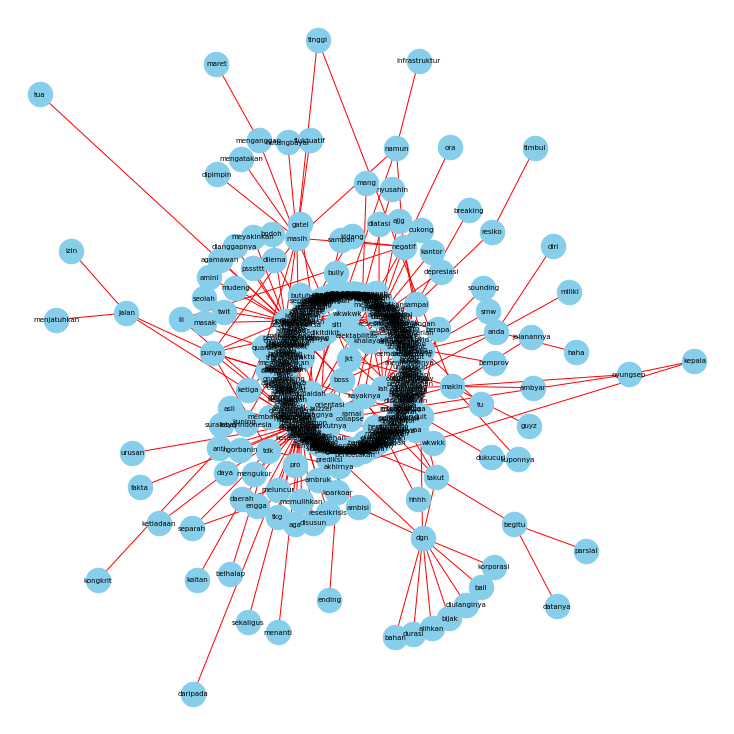

In [ ]:
# Make A Random Sample of the node
import random
k = 600

sampled_nodes = random.sample(G.nodes, k)
sampled_graph = G.subgraph(sampled_nodes)

# Visualize the Network
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
nx.draw(sampled_graph, with_labels=True, 
        node_color='skyblue', node_size=600, 
        arrowstyle='->',arrowsize=20, edge_color='r',
        font_size=7,
        pos=nx.kamada_kawai_layout(sampled_graph))

### **Network Metrics and Measurement**

**Centrality Measurement**

In graph theory and network analysis, indicators of centrality identify the most important vertices within a graph. Applications include identifying the most influential person(s) in a social network, key infrastructure nodes in the Internet or urban networks, and super-spreaders of disease. Centrality concepts were first developed in social network analysis, and many of the terms used to measure centrality reflect their sociological origin.

In [ ]:
# Degree Centrality
degree = nx.degree_centrality(sampled_graph)

# Sorted from the Highest
sorted(nx.degree(sampled_graph), key=lambda x: x[1], reverse=True)[0:10]

[('ekonomi', 53),
 ('orang', 23),
 ('udah', 17),
 ('masih', 13),
 ('klo', 13),
 ('lah', 12),
 ('dgn', 11),
 ('makin', 9),
 ('negatif', 9),
 ('emang', 9)]

In [ ]:
# Betweenness Centrality
betweenness = nx.betweenness_centrality(sampled_graph)

# Sorted from the Highest
sorted(nx.betweenness_centrality(sampled_graph, normalized=True).items(), key=lambda x:x[1], reverse=True)[0:10]

[('ekonomi', 0.02924005318365866),
 ('orang', 0.008956128593930726),
 ('udah', 0.005498875925368595),
 ('dgn', 0.0049498834327095015),
 ('masih', 0.004759124119289613),
 ('klo', 0.004100824559598334),
 ('lah', 0.003180383576104131),
 ('makin', 0.0030716565433083812),
 ('emang', 0.0027661168040060396),
 ('takut', 0.002691988335299267)]

In [ ]:
# Closeness Centrality
closeness = nx.closeness_centrality(sampled_graph)

# Sorted from the Highest
sorted(nx.closeness_centrality(sampled_graph).items(), key=lambda x:x[1], reverse=True)[0:10]

[('ekonomi', 0.12408545732903535),
 ('orang', 0.09720774094007463),
 ('udah', 0.09720774094007463),
 ('lah', 0.09285015255310575),
 ('punya', 0.09285015255310575),
 ('negatif', 0.09096805486621848),
 ('masih', 0.09066176511919417),
 ('takut', 0.09035753100805594),
 ('emang', 0.09005533190769455),
 ('jkt', 0.08714091987184683)]

In [ ]:
# Eigenvector Centrality
eigenvector = nx.eigenvector_centrality(sampled_graph)

# Sorted from the Highest
sorted(nx.eigenvector_centrality(sampled_graph).items(), key=lambda x:x[1], reverse=True)[0:10]

[('ekonomi', 0.5899513868595094),
 ('orang', 0.2558031976187297),
 ('udah', 0.24910785735925617),
 ('lah', 0.1930184742643668),
 ('punya', 0.18089813378923836),
 ('masih', 0.1794508055871783),
 ('negatif', 0.16485789953646451),
 ('takut', 0.1533106797691317),
 ('sampai', 0.1483673632599755),
 ('emang', 0.14354035107568508)]

***Visualize Network based on Centrality Measurement***

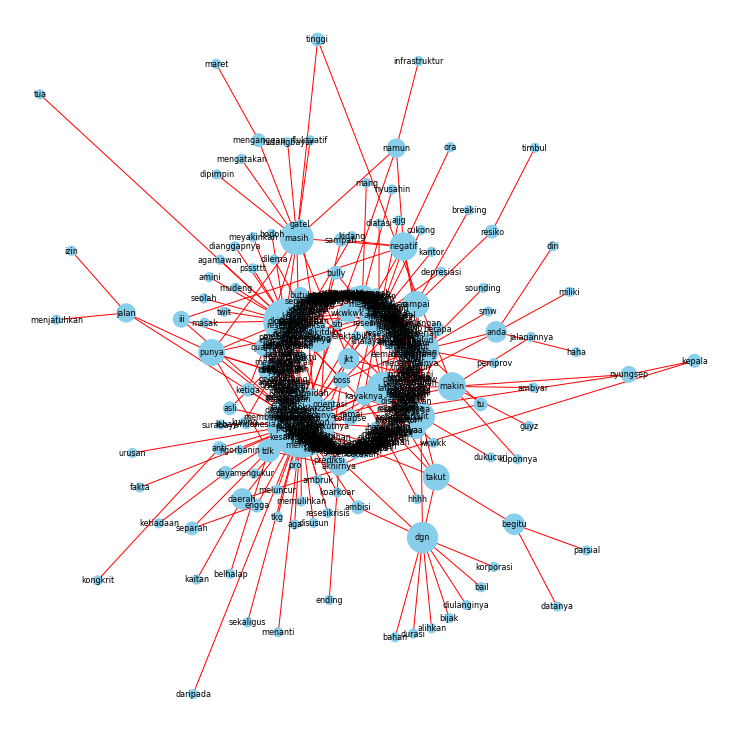

In [ ]:
# Set Degree Dictionary
d = dict(degree)

# Visualize the Network
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
nx.draw(sampled_graph, with_labels=True, 
        node_color='skyblue', nodelist=d.keys(),
        node_size=[v * 50000 for v in d.values()], 
        arrowstyle='->',arrowsize=20, edge_color='r',
        font_size=8,
        pos=nx.kamada_kawai_layout(sampled_graph))

**Network Topology Measurement**

The configuration, or topology, of a network is key to determining its performance. Network topology is the way a network is arranged, including the physical or logical description of how links and nodes are set up to relate to each other.

In [ ]:
# Show Number of Nodes
nx.number_of_nodes(sampled_graph)

600

In [ ]:
# Show Number of Edges
nx.number_of_edges(sampled_graph)

218

In [ ]:
# Show Graph Density
nx.density(sampled_graph)

0.001213132999443517

### **Community Detection**

Community detection is a fundamental problem in dividing text (modelled as nodes in a social graph) with certain word connections into densely knitted and highly related groups with each group well separated from different group members.

**Modularity Community**

In [ ]:
# Import Module
from networkx.algorithms.community import greedy_modularity_communities

# Modularity Community Detection
communities_m = sorted(greedy_modularity_communities(sampled_graph), key=len, reverse=True)
communities_m

[frozenset({'aga',
            'akhirnya',
            'ambruk',
            'anti',
            'asli',
            'belhalap',
            'daripada',
            'daya',
            'disusun',
            'ekonomi',
            'ending',
            'engga',
            'fakta',
            'ganjar',
            'iii',
            'izin',
            'jalan',
            'ketiadaan',
            'ketiga',
            'koarkoar',
            'kongkrit',
            'lebayindonesia',
            'meluncur',
            'membaiknya',
            'memulihkan',
            'menanti',
            'mengukur',
            'menjatuhkan',
            'ngorbanin',
            'otak',
            'pro',
            'punya',
            'quartal',
            'resesikrisis',
            'sekaligus',
            'separah',
            'surabaya',
            'tdk',
            'tkg',
            'urusan'}),
 frozenset({'ajjg',
            'berapa',
            'breaking',
            'collapse',


In [ ]:
# Set Node Community Function
def set_node_community(sampled_graph, communities_m):
      '''Add community to node attributes'''
      for c, v_c in enumerate(communities_m):
        for v in v_c:
          # Add 1 to save 0 for external edges
          sampled_graph.nodes[v]['community'] = c + 1      

In [ ]:
# Set Colour Function
def get_color(i, r_off=1, g_off=1, b_off=1):
     '''Assign a color to a vertex.'''
     r0, g0, b0 = 0, 0, 0
     n = 16
     low, high = 0.1, 0.9
     span = high - low
     r = low + span * (((i + r_off) * 3) % n) / (n - 1)
     g = low + span * (((i + g_off) * 5) % n) / (n - 1)
     b = low + span * (((i + b_off) * 7) % n) / (n - 1)
     return (r, g, b) 

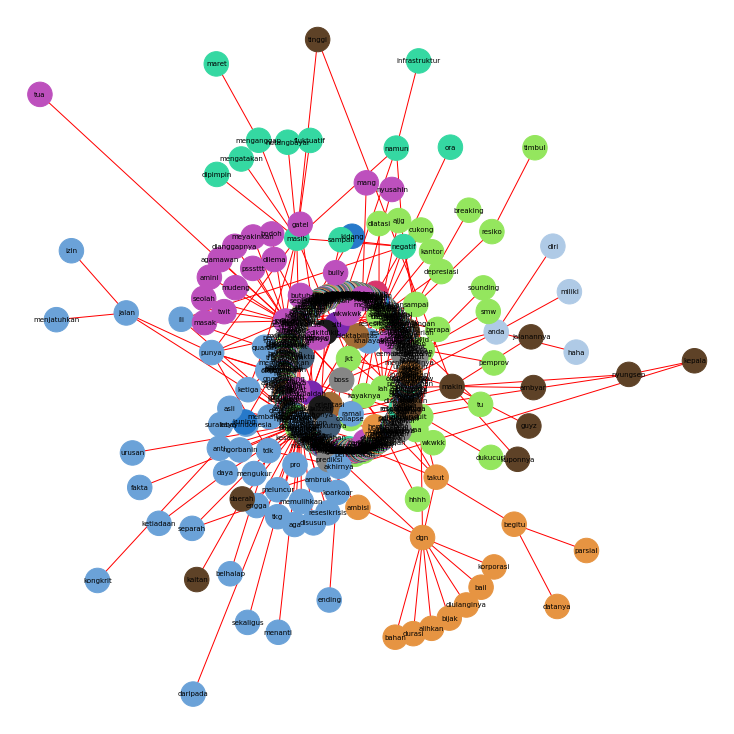

In [ ]:
# Set Node Communities
community = set_node_community(sampled_graph, communities_m)

# Set Node Color
node_color = [get_color(sampled_graph.nodes[v]['community']) for v in sampled_graph.nodes]

# Visualize the Network
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
nx.draw(sampled_graph, with_labels=True, 
        node_color = node_color, node_size=600, 
        arrowstyle='->',arrowsize=20, edge_color='r',
        font_size=7, pos=nx.kamada_kawai_layout(sampled_graph))

## **E. Word Cloud**

A word cloud is a collection, or cluster, of words depicted in different sizes. The bigger and bolder the word appears, the more often it’s mentioned within a given text and the more important it is.

Also known as tag clouds or text clouds, these are ideal ways to pull out the most pertinent parts of textual data, from blog posts to databases. They can also help business users compare and contrast two different pieces of text to find the wording similarities between the two.

In [ ]:
# Import Libraries
import wordcloud
import matplotlib.pyplot as plt

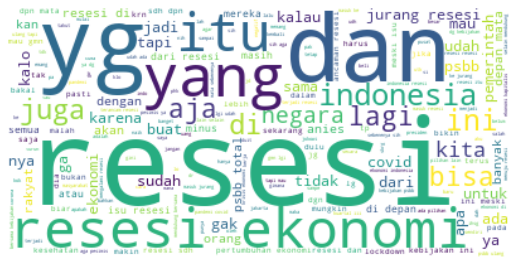

In [ ]:
# Import Modules
from wordcloud import WordCloud
from wordcloud import STOPWORDS

# Build Word Cloud
text = " ".join(review for review in df.text)
cloud = WordCloud(background_color='white').generate(text)
plt.figure(figsize=(7, 7), facecolor=None)
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
# Save File
cloud.to_file("wordcloud.png")